In [1]:
# matplotlib에서 한글 폰트를 설정하는 방법
import matplotlib.pyplot as plt
plt.rc("font", family="malgun gothic")

# 음수 기호 출력 방법
import matplotlib
matplotlib.rcParams["axes.unicode_minus"]=False

# 그래프를 선명하게 출력하는 방법
%config InlineBackend.figure_format = "retina"

import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(cancer.keys())
print(cancer["DESCR"])
print(cancer.target)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these 

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# step 1. 데이터 준비
x = cancer.data
y = cancer.target
# print(y)


# step 2. 학습 데이터와 검증 데이터로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    random_state=42)

# step 3. 모델 생성
model = LogisticRegression()


# step 4. 학습
model.fit(x_train, y_train)

# step 5. 평가
print(model.score(x_test, y_test))

0.965034965034965


In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# step 1. 데이터 준비
housing = fetch_california_housing()

In [5]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [6]:
#1-1 : 데이터 프레임으로 가져오자.  
#x = housing["data"]   # 독립 변수
#y = housing["target"] # 종속 변수(집값)
housing = fetch_california_housing(as_frame=True)

#전체 프레임값을 판단스로 
housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
#1-2 .X값만 판다스로  
housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
#1-3. y값만 출력 
housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [9]:
#1-4. 프레임의 데이터 정보  
housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


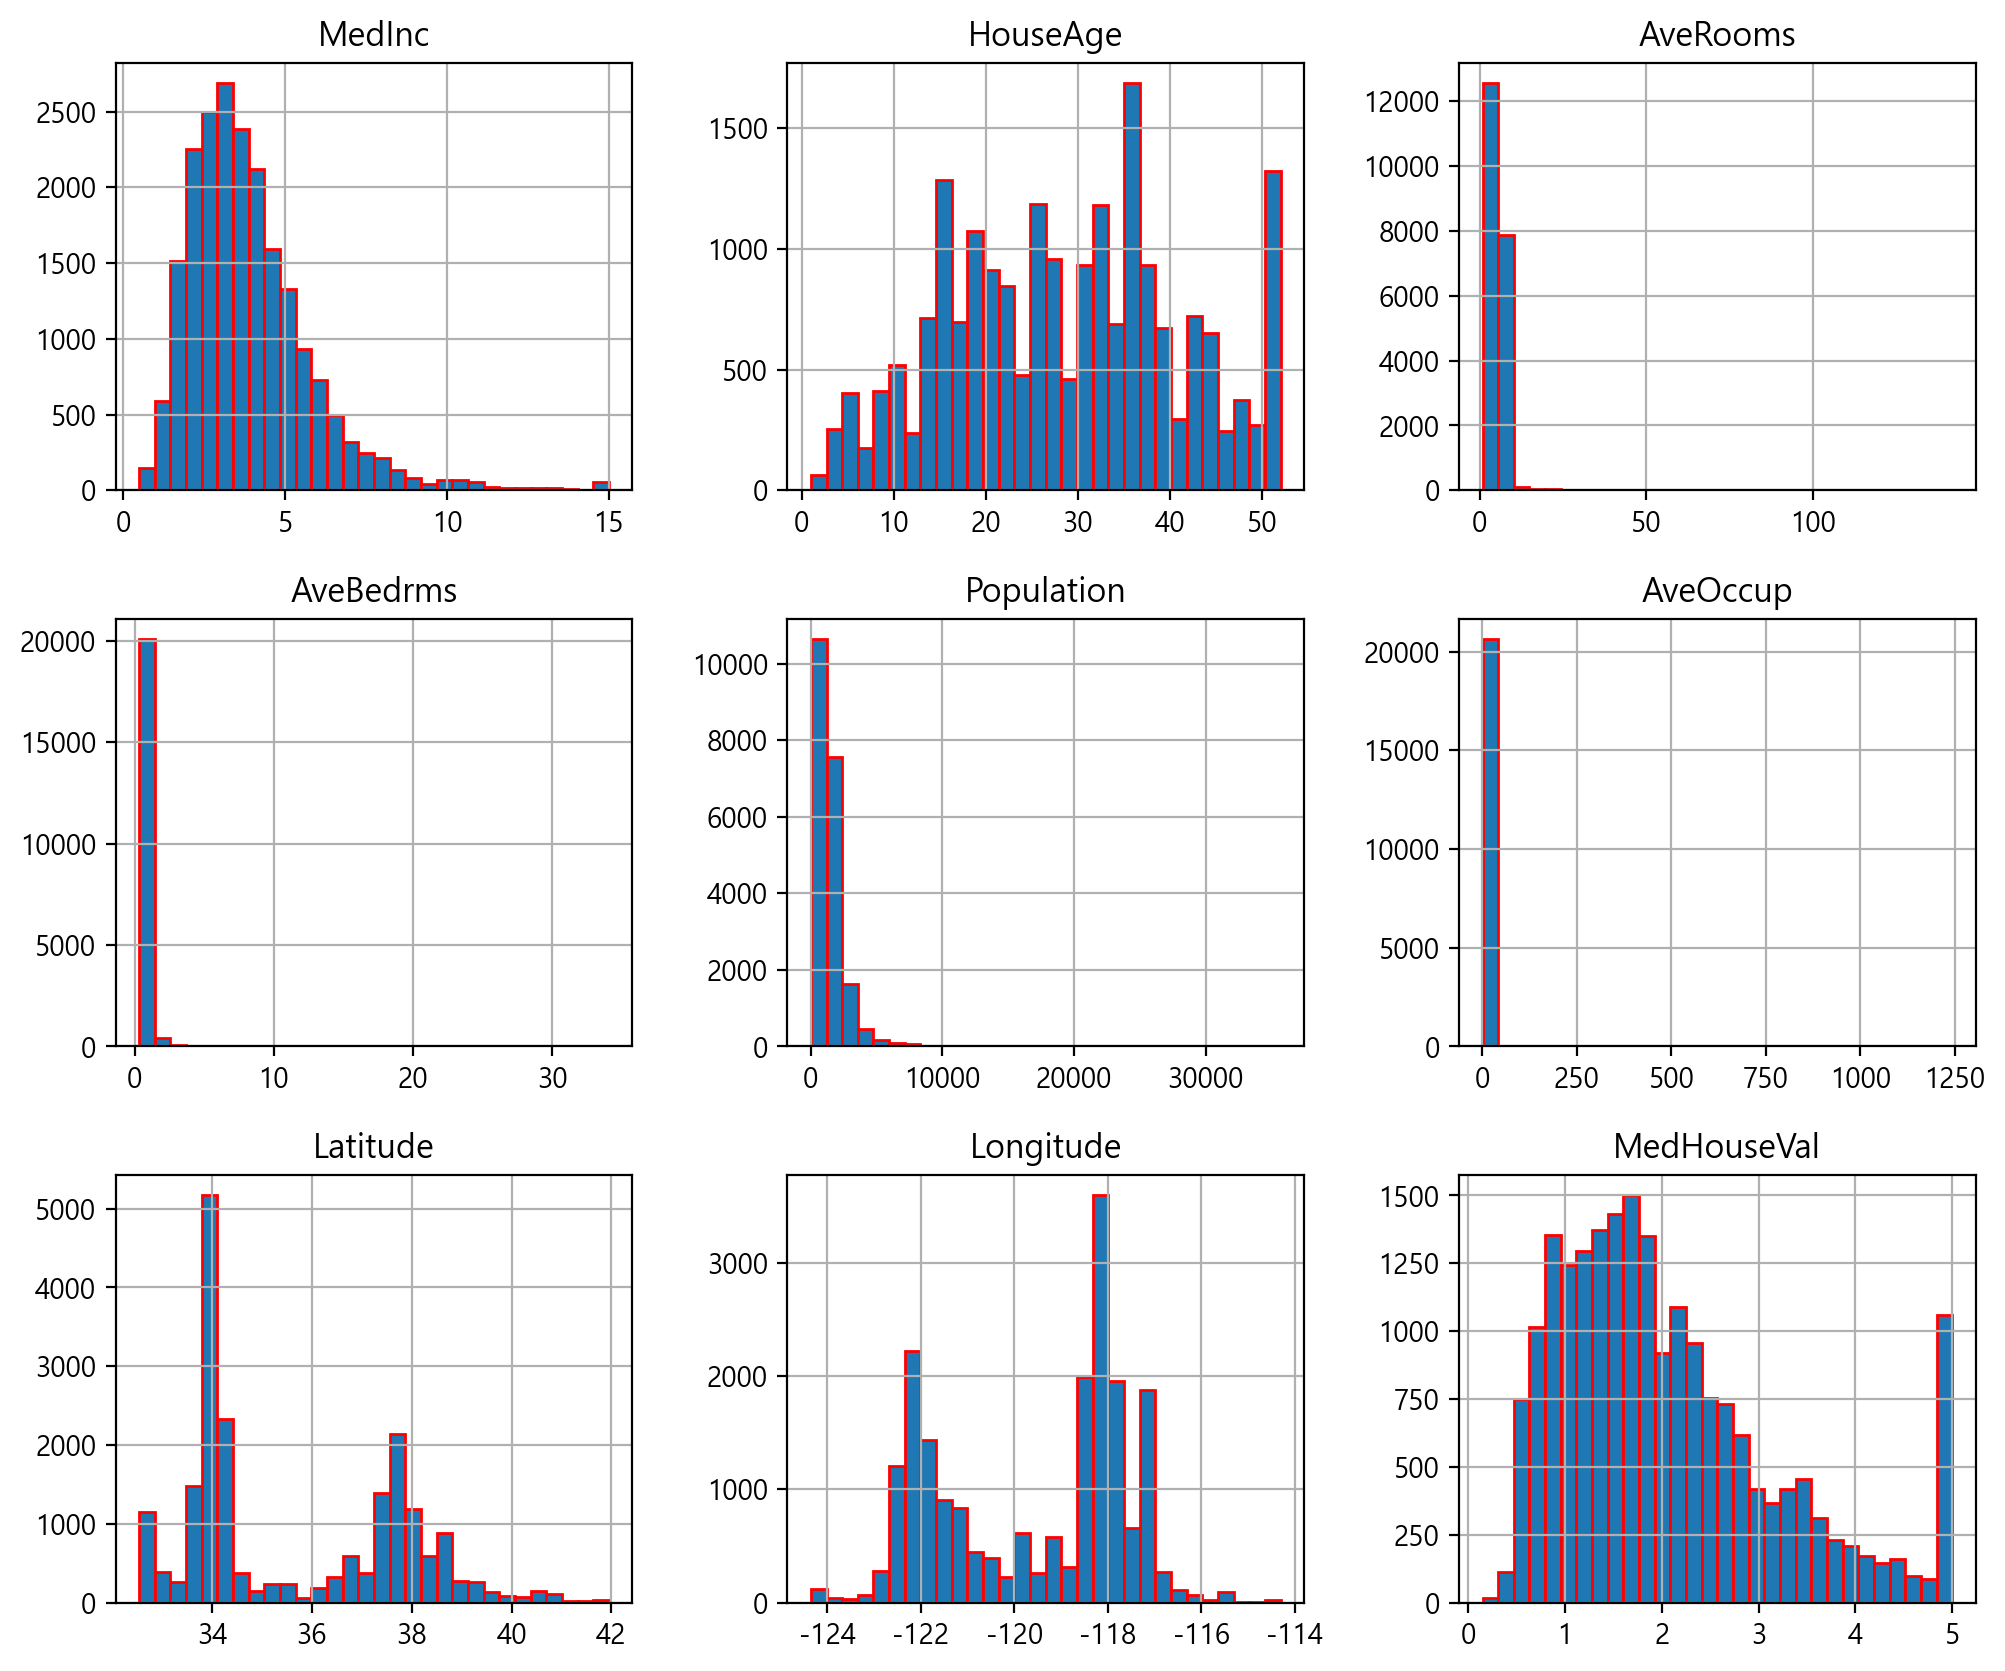

In [10]:
#1-5 시각화 해서 전체 값을 한눈으로 직관하자. 
housing.frame.hist(figsize=(12,10), bins=30, edgecolor='red');

In [11]:
# step 2.  EDA작업 연동  
#데이터 직관  ->  MedInc 분포가 적당하다. / AveRooms, AveBedrms,AveOccup, Population 
#->데이터 범위가 크다 보니 큰값, 작은값이 정확하게 보이지 않는다  -> 이상치로 간주된다.  
m_list  =[ 'AveRooms', 'AveBedrms','AveOccup', 'Population' ]
housing.frame[m_list].describe()
# 확인! : 각 속성에 max값  75%값 비교해서 차이를 확인하자.  --> 평균과 최대값 각각 비교하며 일반적인 범위를 벗어남

,AveRooms,AveBedrms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744
std,2.474173,0.473911,10.386050,1132.462122
min,0.846154,0.333333,0.692308,3.000000
25%,4.440716,1.006079,2.429741,787.000000
50%,5.229129,1.048780,2.818116,1166.000000
75%,6.052381,1.099526,3.282261,1725.000000
max,141.909091,34.066667,1243.333333,35682.000000


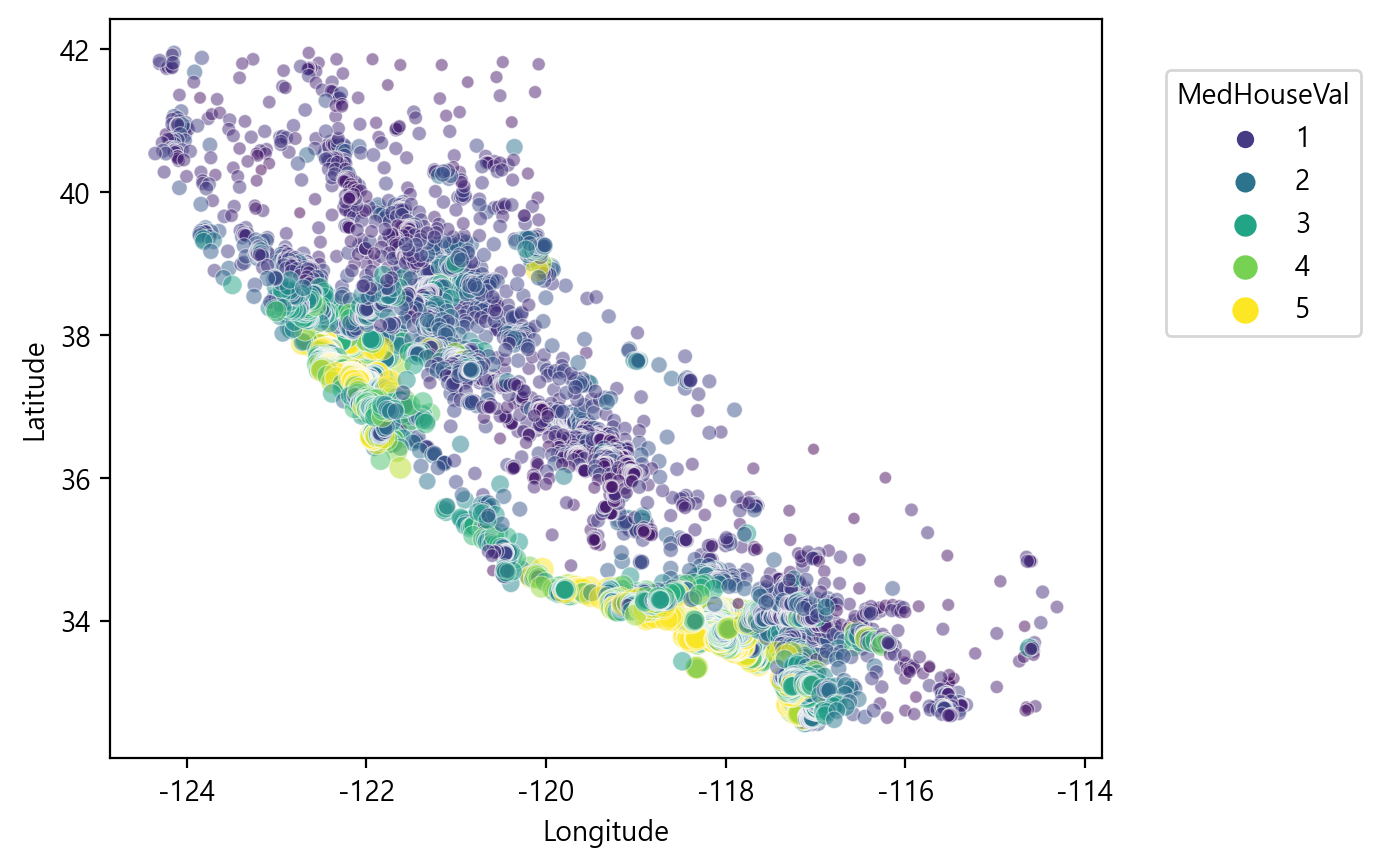

In [12]:
#2-1 : 위도 , 경도를 이용해서  지리정보를 확인 하자. (지리적 분포 확인)
import seaborn as sns

sns.scatterplot(data=housing.frame,
                x="Longitude", 
                y="Latitude",
                size="MedHouseVal", hue="MedHouseVal", #주택의 중앙값에 따라 점의 크기와 색상을 다르게 주곘다.
                palette="viridis", alpha=0.5);

plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95),loc="upper left");
#  고가 주택  : 샌디에고,로스앤젤레스
#   해안주택  :  샌프란시스코  

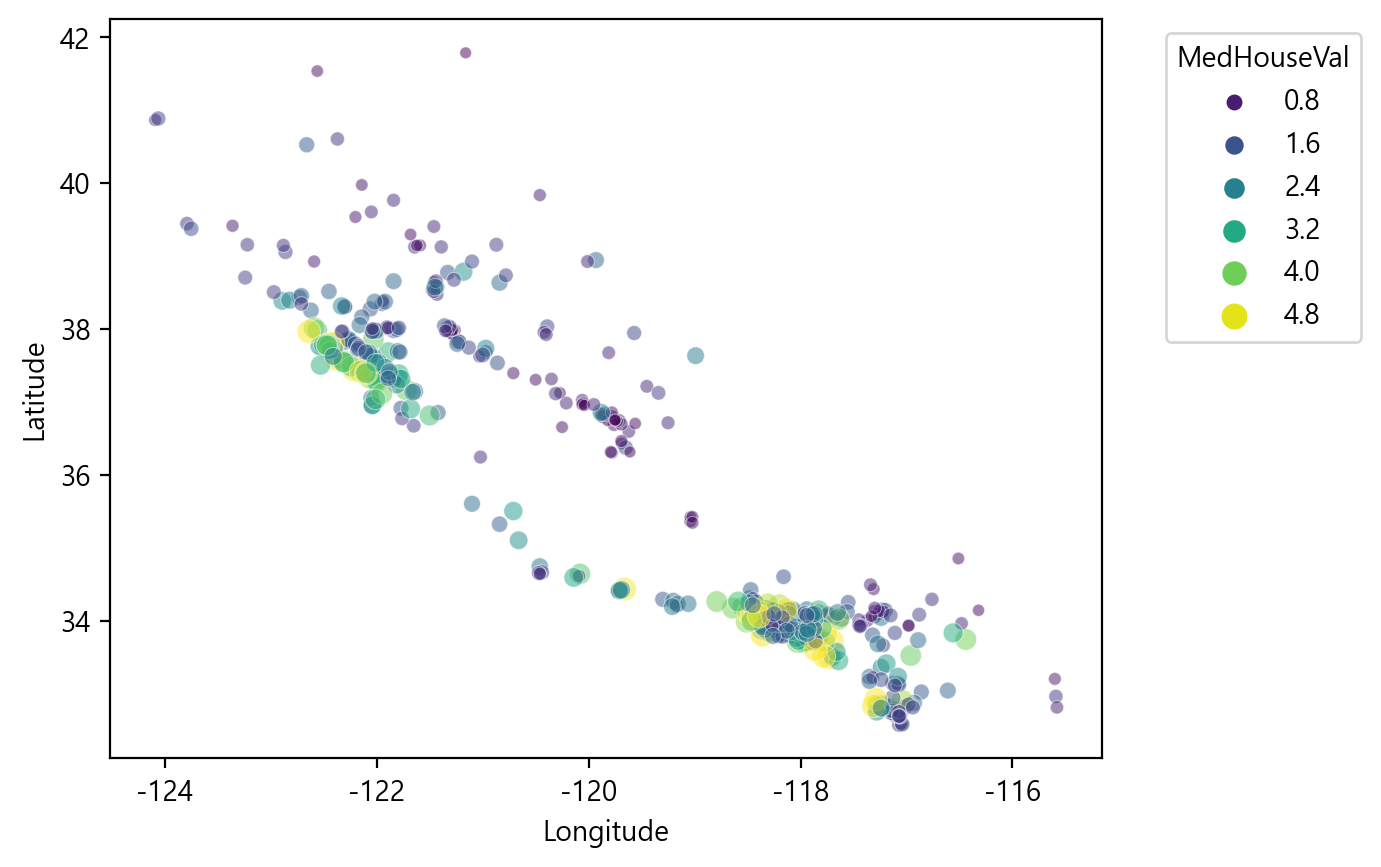

In [13]:
#2-2 : 데이텅 분포 및 데이터 포인를 확인 해보자.  -> 샘플링을 무작위로 지정하는 방법   
import numpy as np

rng = np.random.RandomState(0)
indices = rng.choice(np.arange(housing.frame.shape[0]), size=500,
                     replace=False)

sns.scatterplot(data=housing.frame.iloc[indices],
                x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",
                palette="viridis", alpha=0.5);

plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 1), loc="upper left")


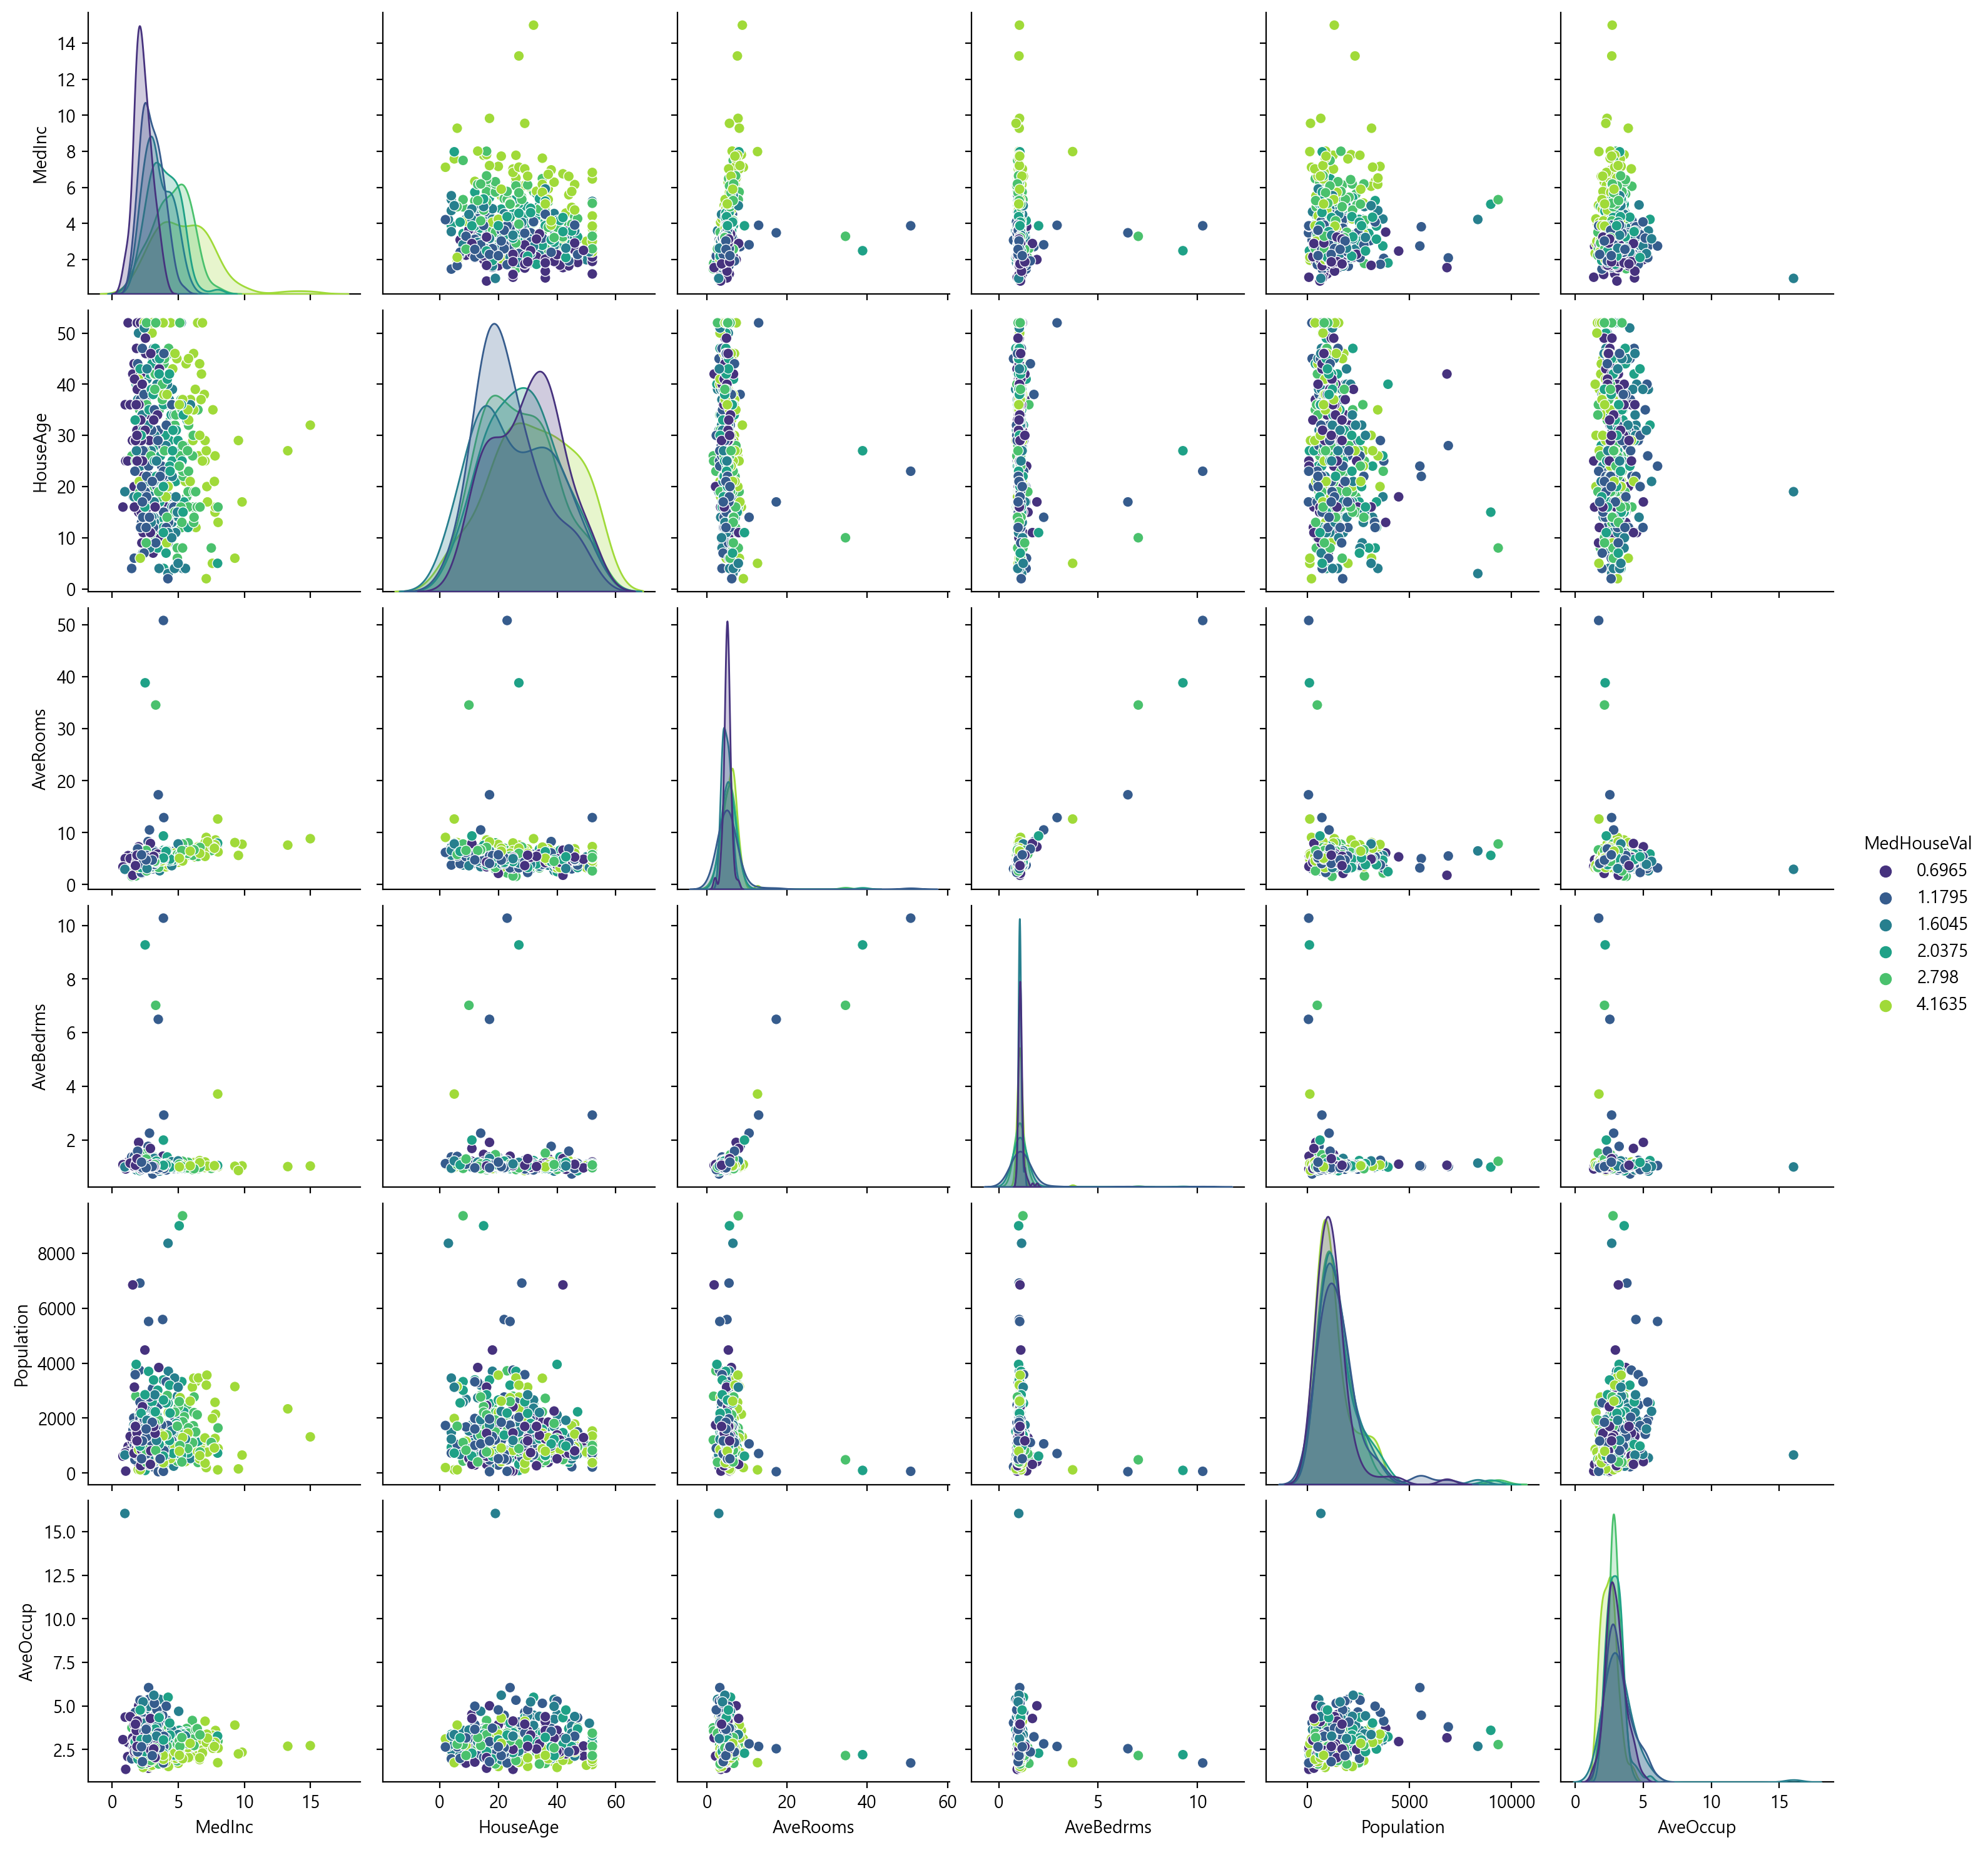

In [32]:
#2-3 : 위도 경도로 확인 후에  두 개의 값을 제거한 후 데이터 확인  
# 이상치 확인  및 중위소득이 고가와, 저가, 중앙값 주택에 영향을 미친다.  
import pandas as pd

columns_drop = ["Longitude", "Latitude"]
subset = housing.frame.iloc[indices].drop(columns=columns_drop) #위치를 제거하고 서브셋 데이터를 생성한다

subset["MedHouseVal"] = pd.qcut(subset["MedHouseVal"], 6, retbins=False) #구역을 나눈다
subset["MedHouseVal"] = subset["MedHouseVal"].apply(lambda x: x.mid) #간 구역에 중간값으로 설정 하겠다

sns.pairplot(data=subset, hue="MedHouseVal", palette="viridis"); #각 구간과 주택 중앙값의 상관관계를 확인


#양의 상관관계(점들이 오른쪽으로 기울어져 있다), 음의 상관관계(오른쪽 아래) , 상관관계가 없는지 확인(분포)
plt.savefig('plot01.png')

<<다중 회귀 모델을 이용한 특성 중요도 평가>>

In [15]:
#2-4 : 다항값들은 시각화를 했을 때 너무 많아서 혼란이 야기될 수 있다. (2-3)
  # -> 선형 예측 모형 생성하고  교차검증을 통해 리턴받은 계수의 값으로 확인 할 수 있다. 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV #정규화 선형 회귀
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

alphas = np.logspace(-3, 1, num=30) #임의값 지정  -> 정규화 강도를 조절하는 값

model = make_pipeline(StandardScaler(), RidgeCV(alphas=alphas)) # 정규모델 생성  (전처리 , 리찌 = 정규화 선형회귀)

#교차검증  
cv_results = cross_validate( 
    model,   # 모형 
    housing.data, #X
    housing.target, #y
    return_estimator=True, n_jobs=2)

### 모델 성능평가 | 교차 검증 결과로 나온 결정계수를 평균하여 모델 성능평가
score = cv_results["test_score"]
print(f"R2 score: {score.mean():.3f} ± {score.std():.3f}")

R2 score: 0.553 ± 0.062


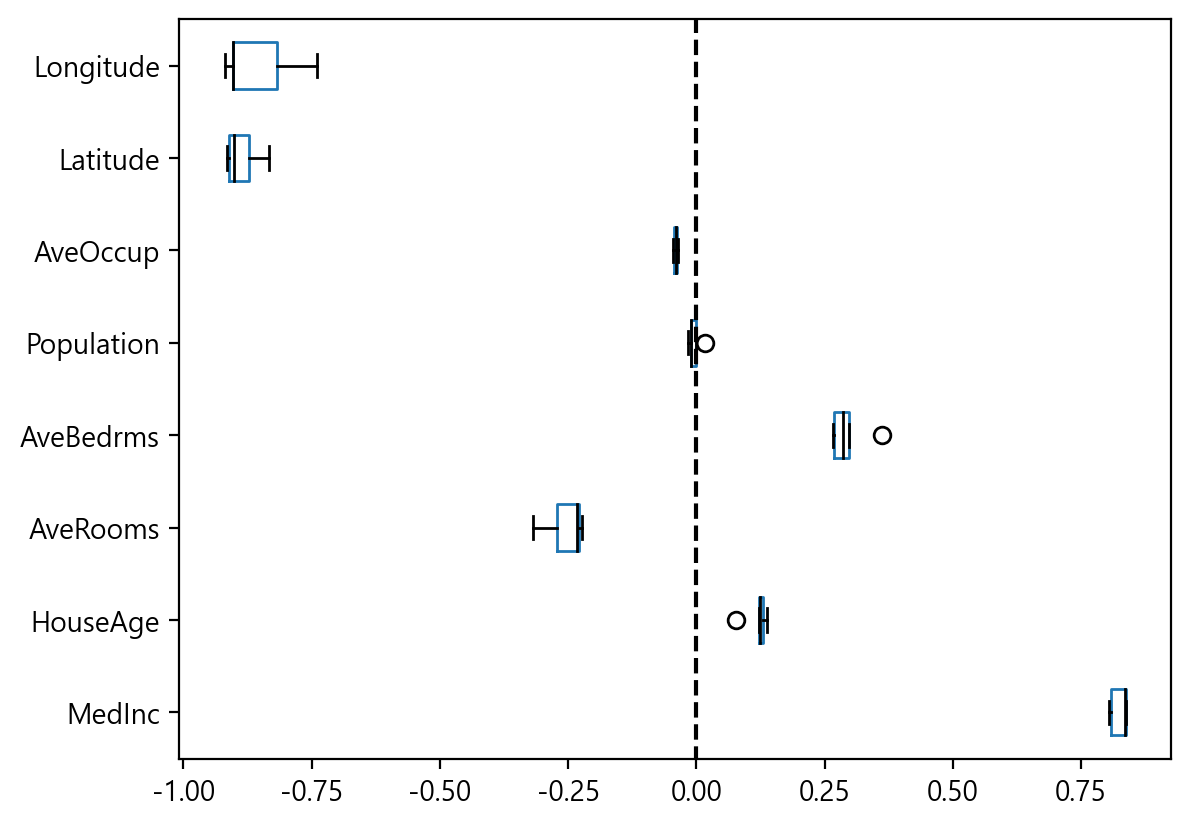

In [16]:
import pandas as pd
#교차 검증 모델의 계수를 데이터 프레임으로 리턴 한다음 데이터 셋을 생성
coefs = pd.DataFrame(
    [est[-1].coef_ for est in cv_results["estimator"]],
    columns=housing.feature_names
)

#박스 플랏으로 특성의 계수 분포를 시각화 -------------> 어떤 특성이 주택 가격에 영향을 미치는 지 알수 있다.
color = {"whiskers": "black", "medians": "black", "caps": "black"}
coefs.plot.box(vert=False, color=color)
plt.axvline(x=0, ymin=-1, ymax=1, color="black", linestyle="--");


In [17]:
#1. 데이터 준비
dataset = fetch_california_housing()
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [18]:
#2.판다스로 가져와 보자. 
df= pd.DataFrame(dataset.data, columns = dataset.feature_names) #X
df['Price']= dataset.target #y 
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [19]:
#3.기본 통계 정보 
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [20]:
#4. 기본 정보를 통해서 타입을 확인 하고  결손값이 없다는 것도 확인 할 수 있다. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


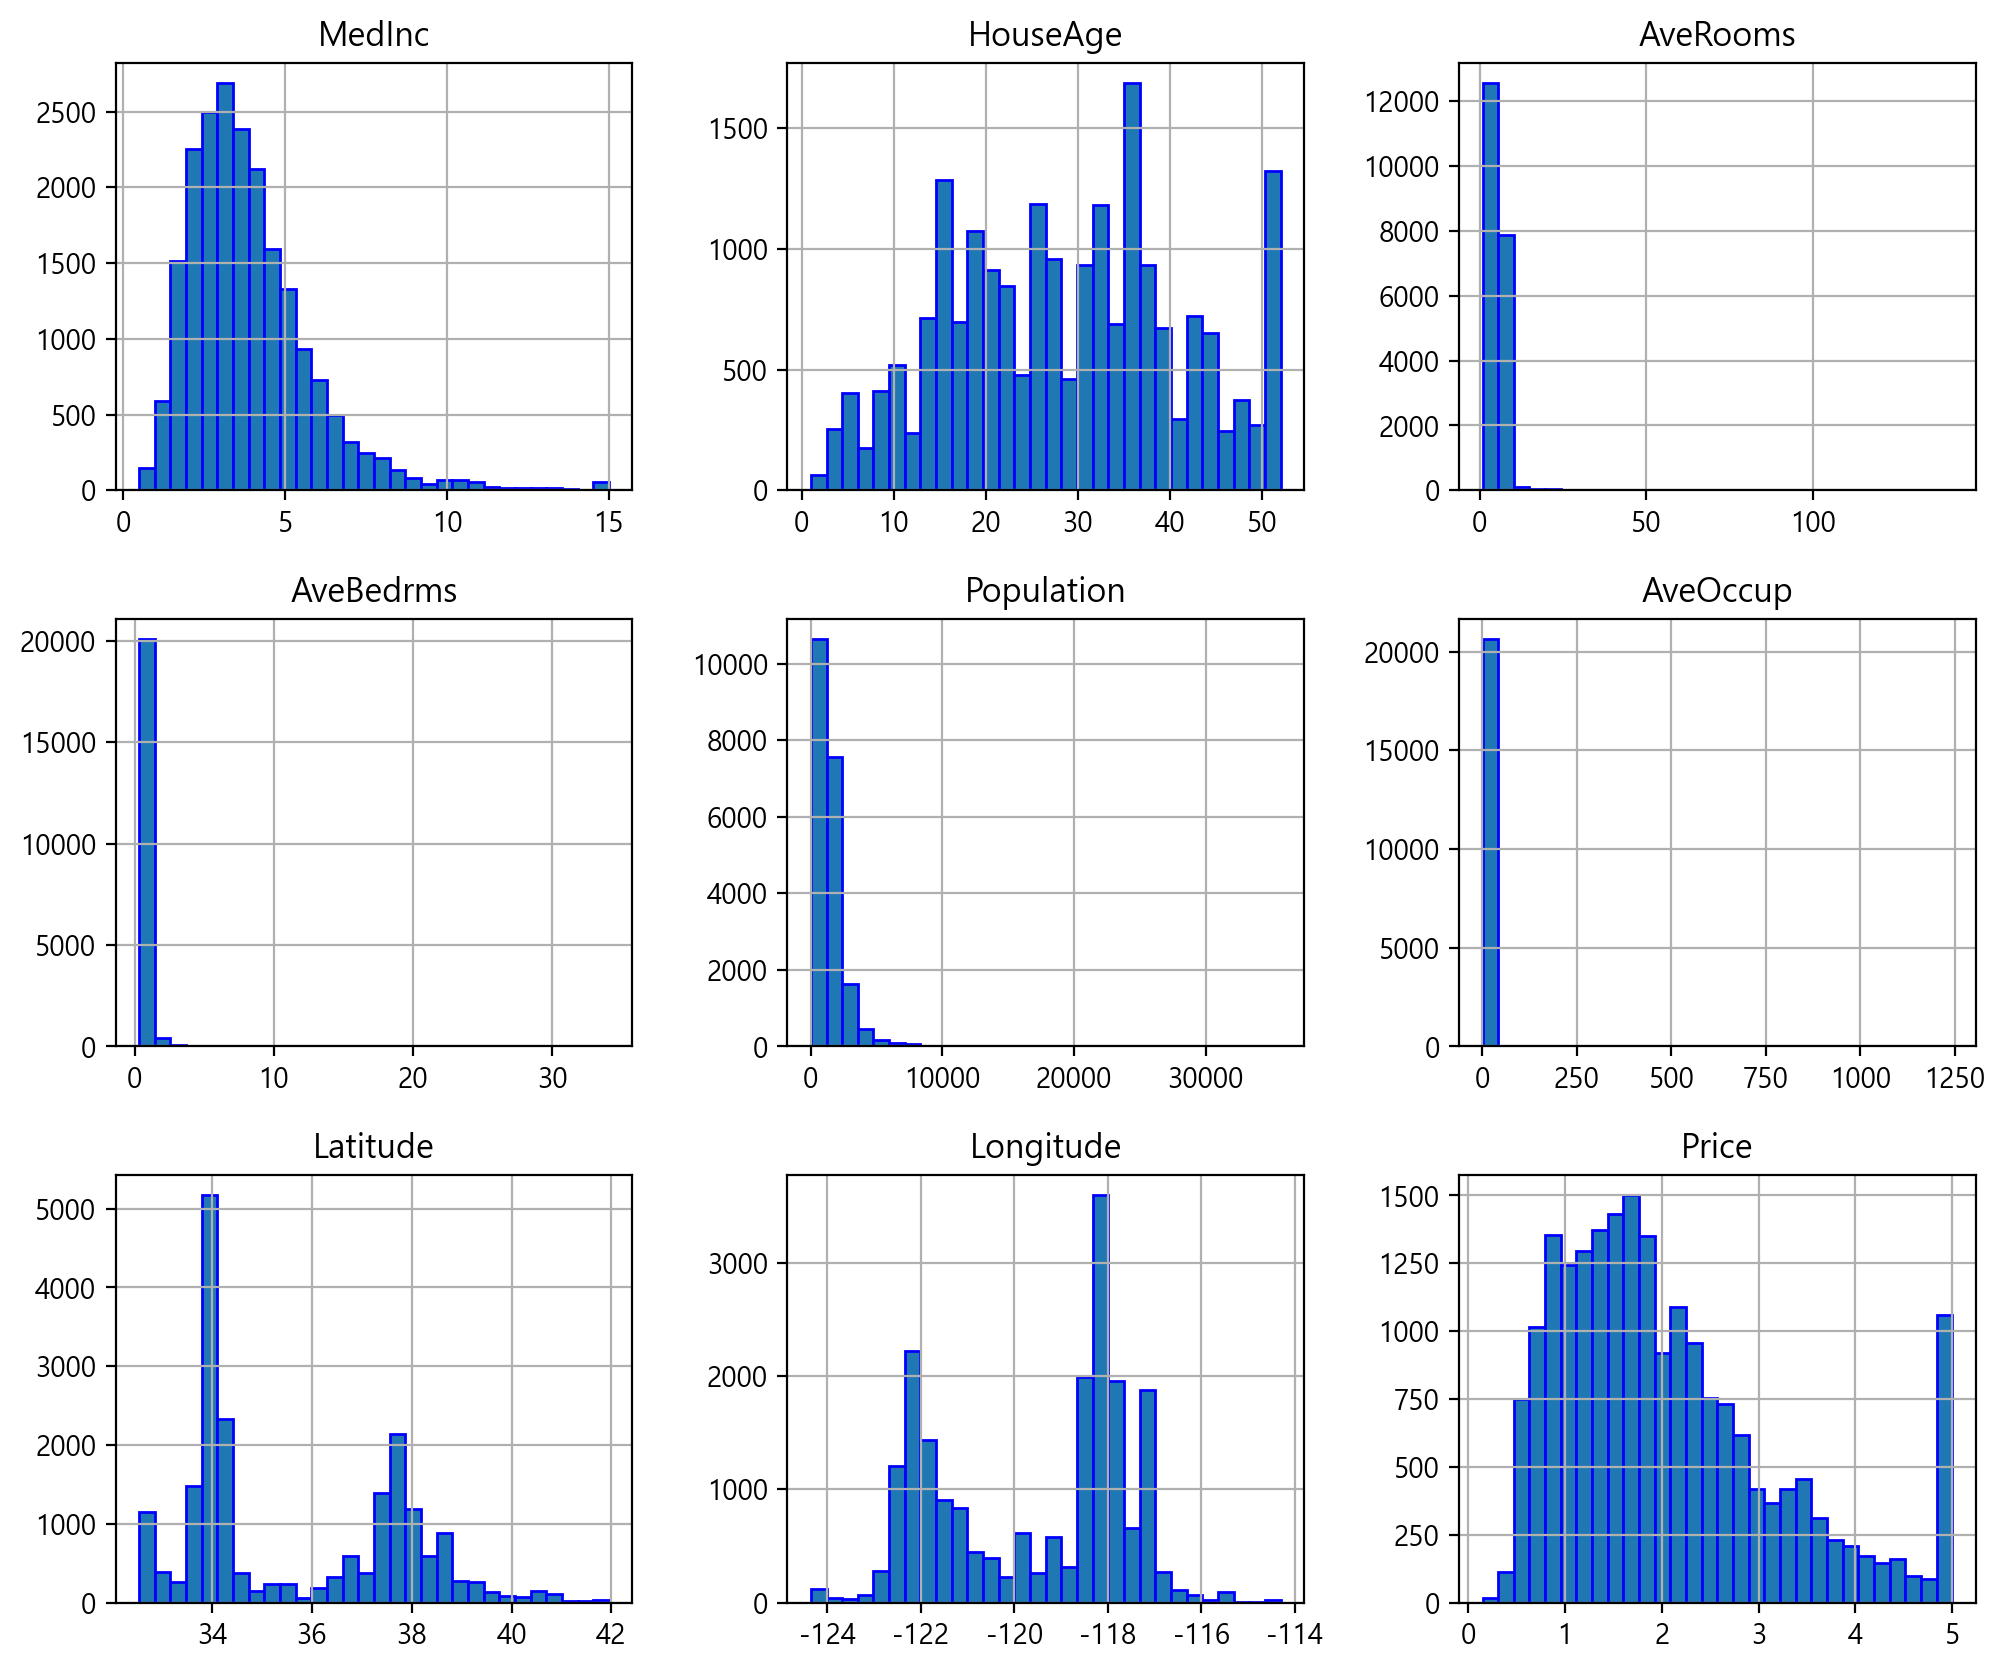

In [21]:
#5. 각 열의 분포  
df.hist(figsize=(12,10), bins=30, edgecolor='blue');

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
8      2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
15     2.1250      50.0  4.242424   1.071970       697.0  2.640152     37.85   
18     1.9911      50.0  5.343675   1.085919       990.0  2.362768     37.84   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  Price  Household  All

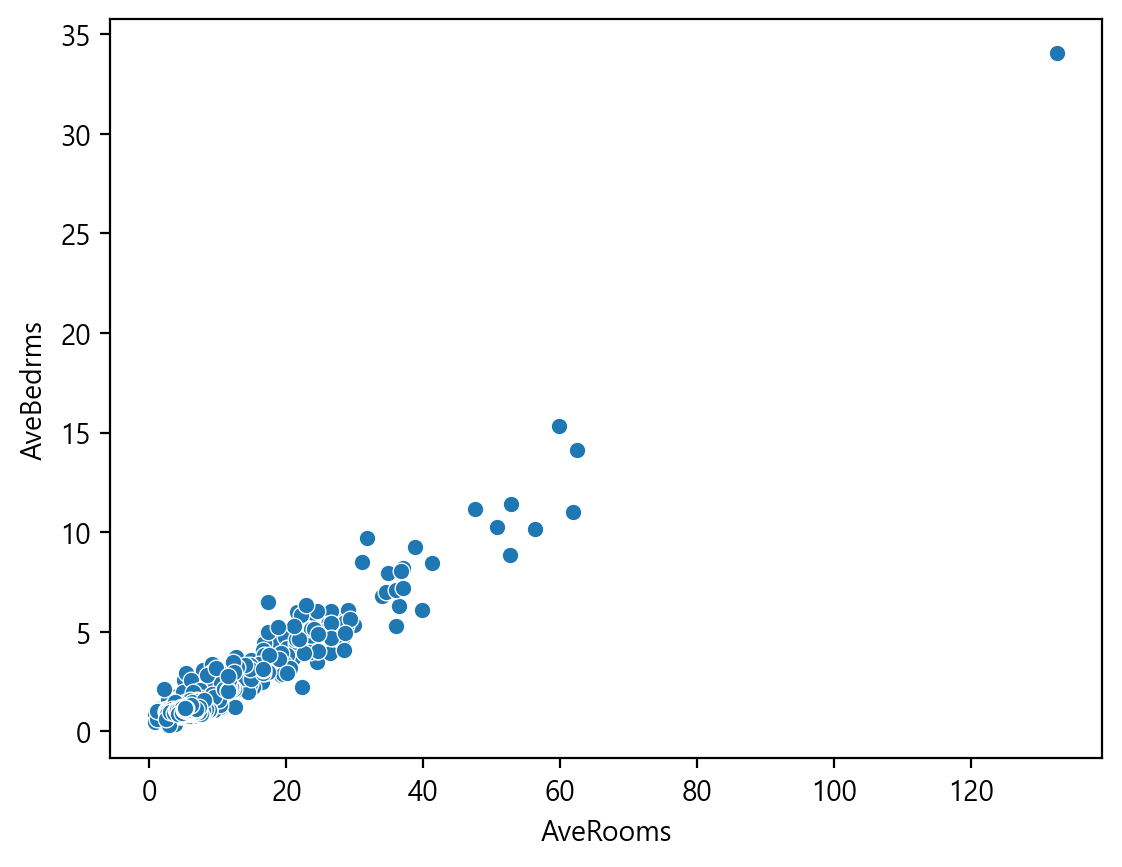

In [35]:
#6. 각 열의 분포 확인후 max, min 확인이 어려울 경우 해결방법? -> 산점도 표시  AveRooms , AveBedrms 
# 두개의 돌출 데이터를 확인한 후 세부 정보를 리턴 받아 본다.  
# dataset.DESCR의 하단에서 가이드 한 부분을 다시 확인   -> 레이크 타호 근처 별장 
sns.scatterplot(data=df, x='AveRooms', y='AveBedrms'); #가구수 평균 , AveBedrms 침실별 가구수 평균
df.query('AveRooms > 100')

#상위 1%의 값을 가진 블록 그룹을 이상치로 정의하자
high_averooms = df['AveRooms'] < df['AveRooms'].quantile(0.99)
high_avebedrms = df['AveBedrms'] < df['AveBedrms'].quantile(0.99)

#이상치 데이터 포인트 필터링
like_houses = df[high_averooms & high_avebedrms]
print(like_houses)


In [23]:
#7. 각 데이터들의 연산을 통해서 컬럼을 추가 해보자. 
df['Household']=df['Population']/ df['AveOccup'] 
df['AllRooms']  = df ['AveRooms'] * df ['Household']
df['AllBedrms']  = df ['AveBedrms'] * df ['Household']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price,Household,AllRooms,AllBedrms
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,126.0,880.0,129.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1138.0,7099.0,1106.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,177.0,1467.0,190.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,219.0,1274.0,235.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,259.0,1627.0,280.0


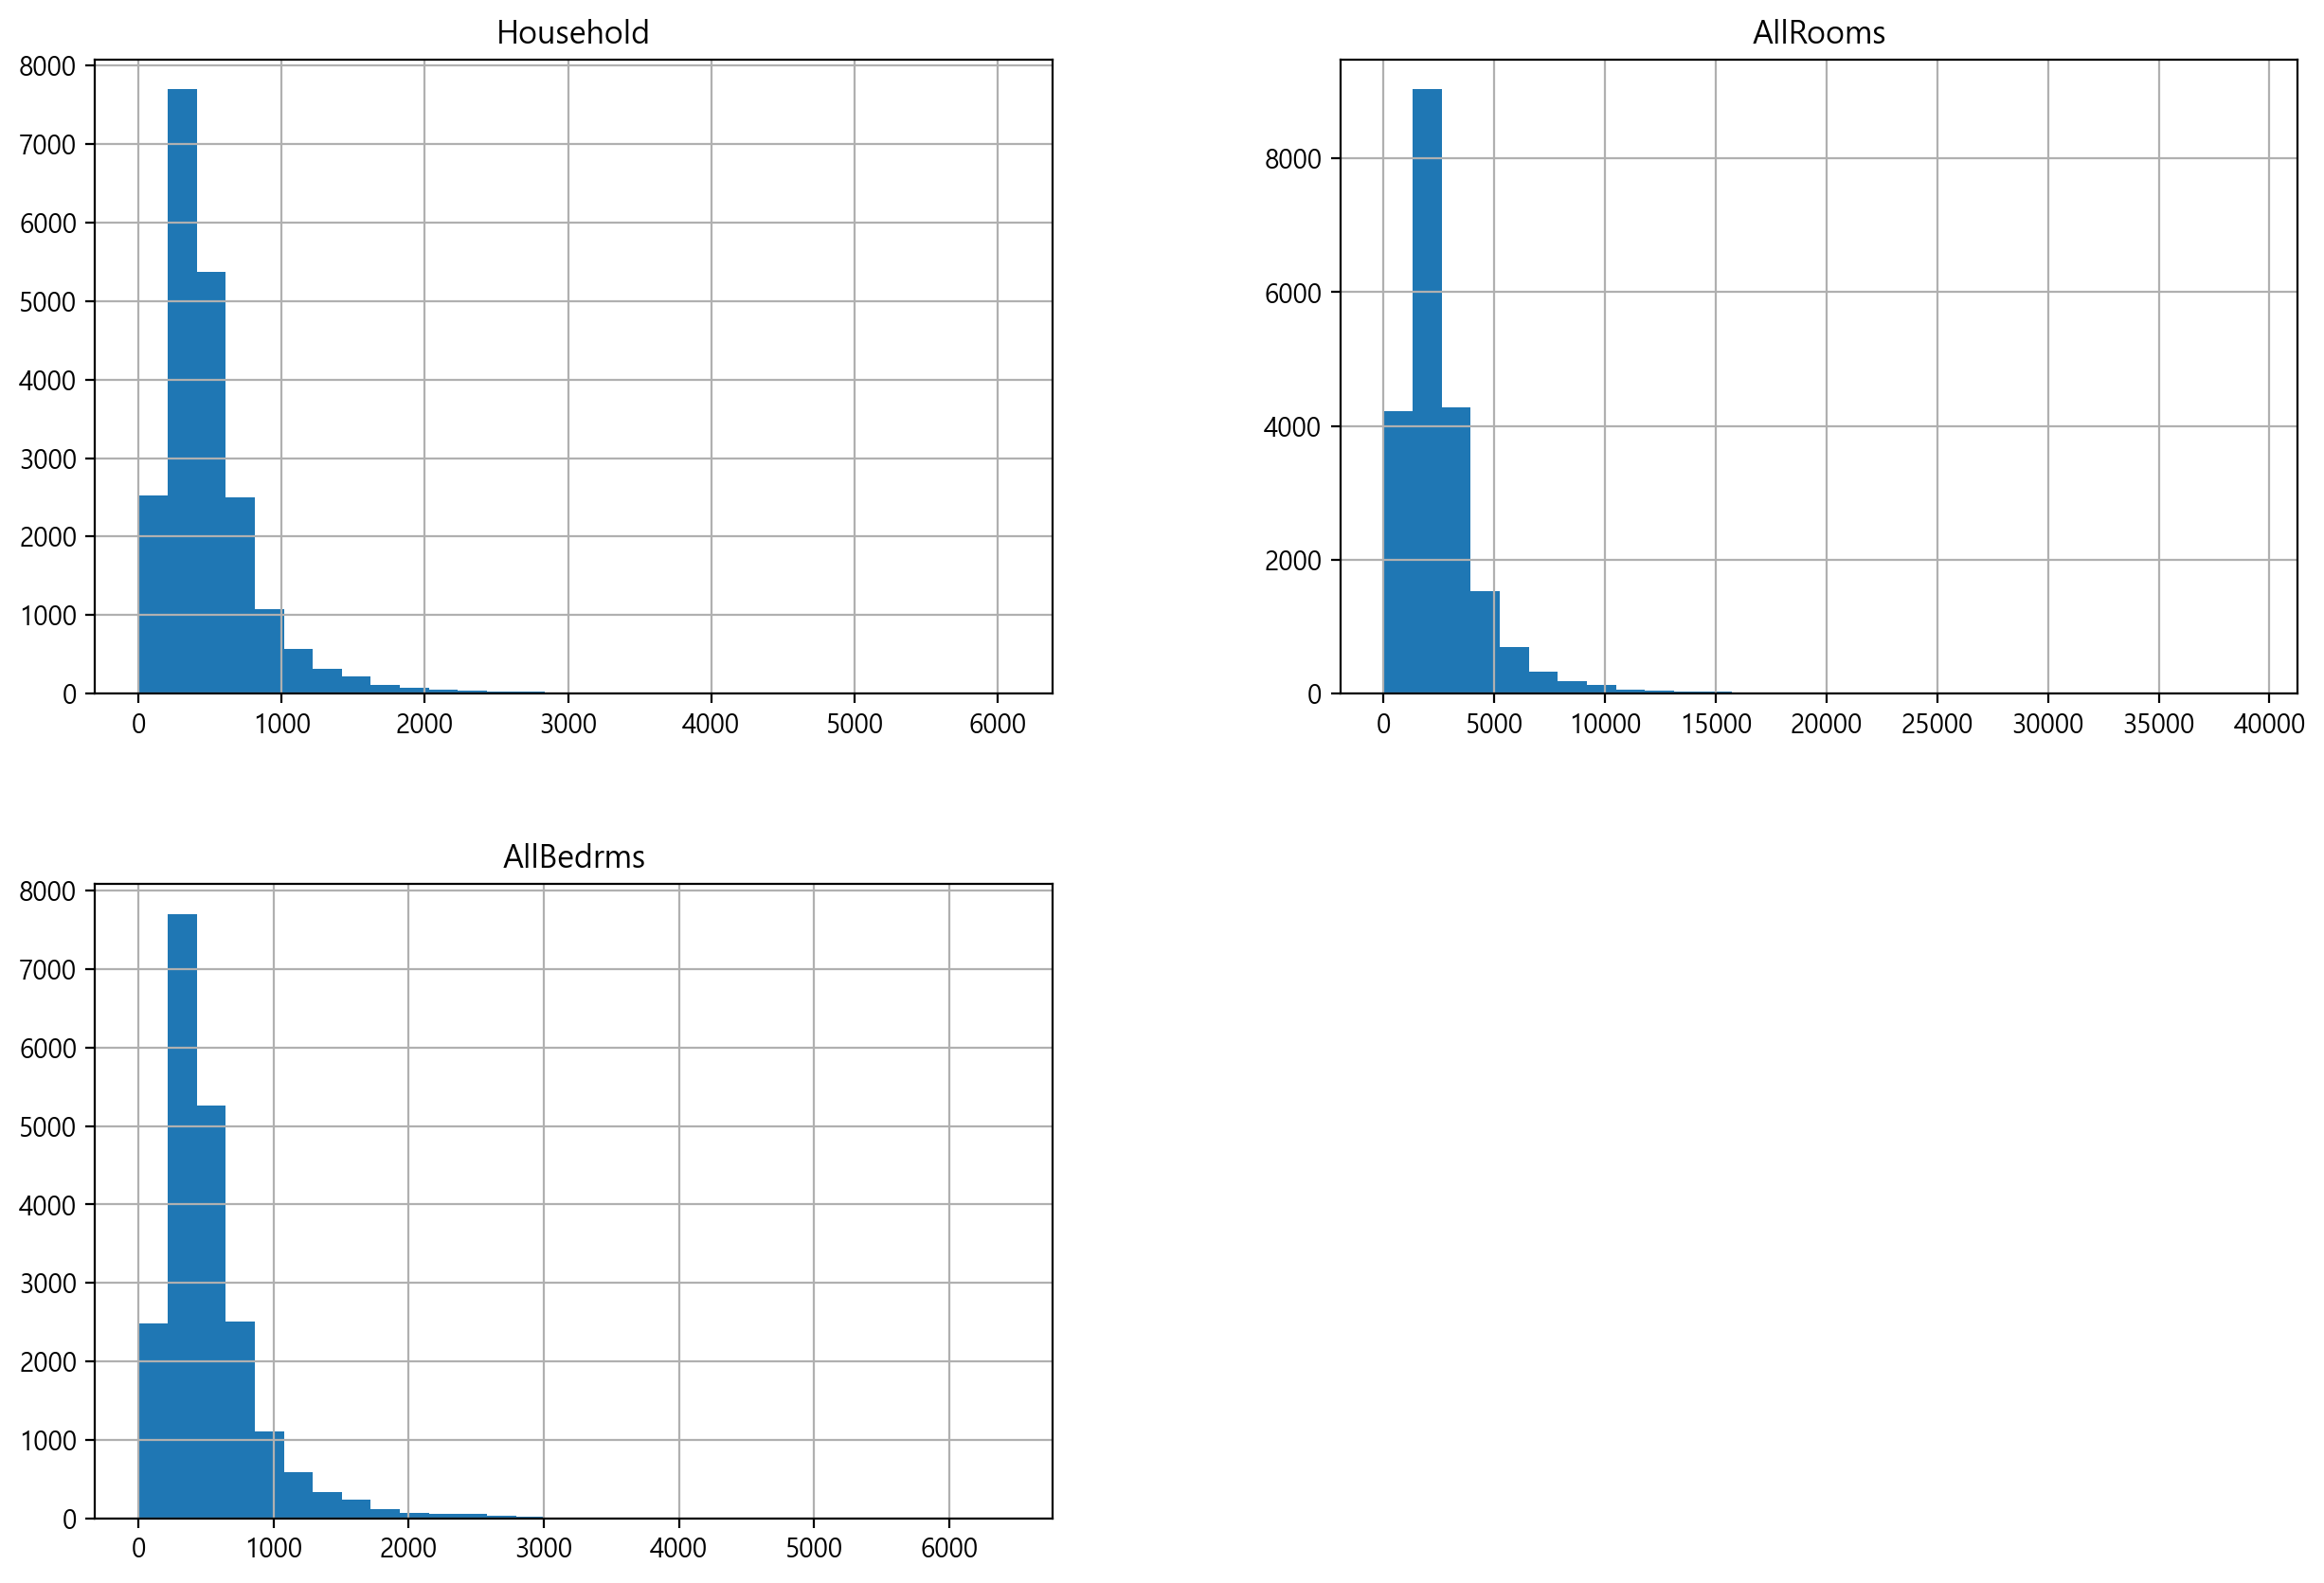

In [24]:
#8.추가된 내용을 다시 확인 해보자  hist -> 산점도 
df[['Household','AllRooms','AllBedrms']].hist(bins=30 , figsize=(15,10));

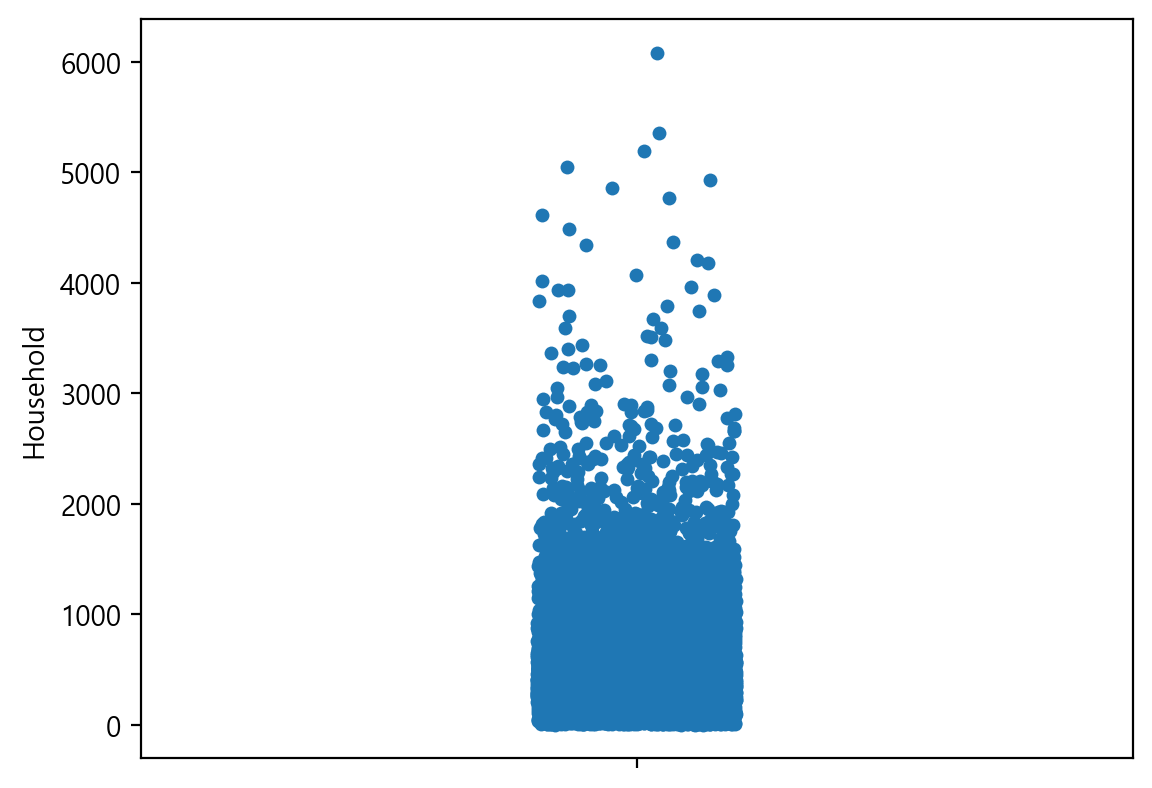

In [25]:
#9.산점도 확인 해보자. 
sns.stripplot(data =df ['Household']);  #가구수에는 이상치가 없어 보인다.  

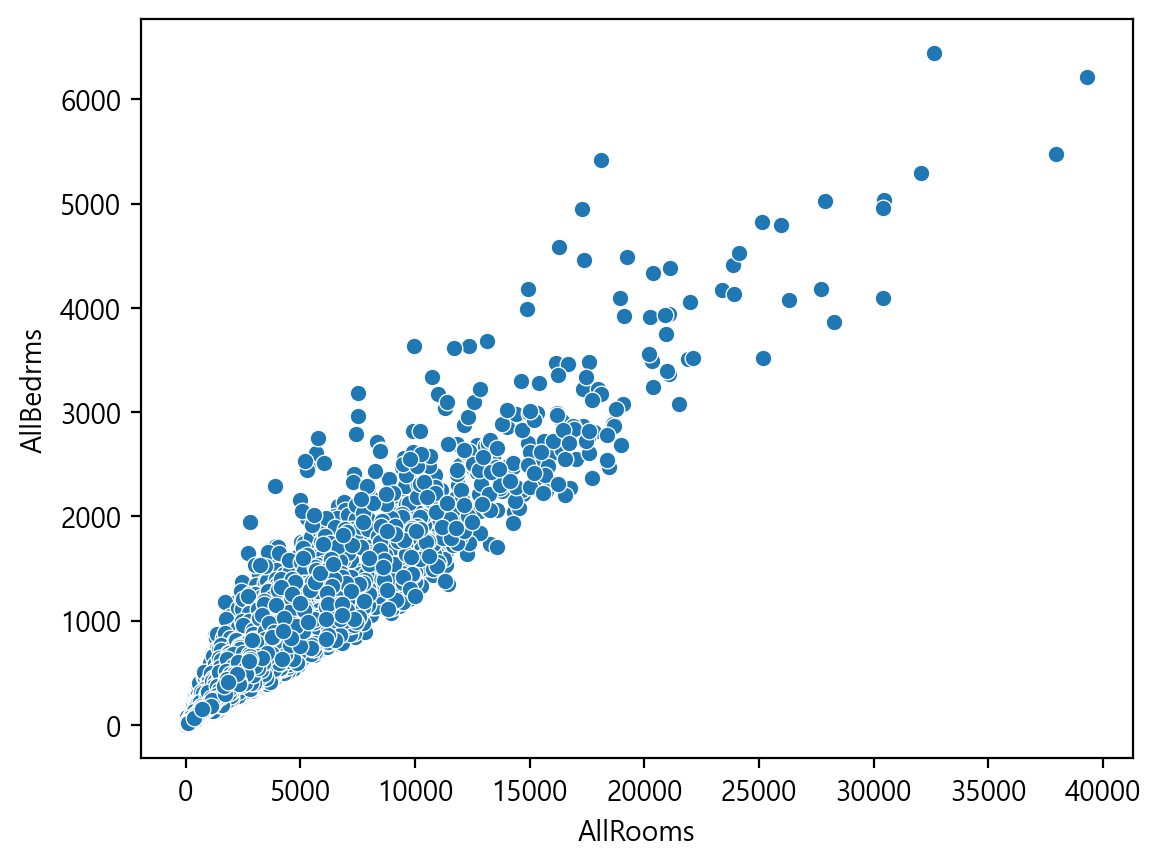

In [26]:
sns.scatterplot(data =df, x='AllRooms', y='AllBedrms'); #깨끗한 상관으로 이상치가 없다.  
#[결론] -> 원본데이터  'Household','AllRooms','AllBedrms'로  분석에 사용해야 한다.  

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price,Household,AllRooms,AllBedrms
9880,2.3087,11.0,5.364518,1.059684,28566.0,4.696810,36.64,-121.79,1.188,6082.0,32627.0,6445.0
15360,2.5729,14.0,5.270497,1.010484,35682.0,7.482072,33.35,-117.42,1.344,4769.0,25135.0,4819.0


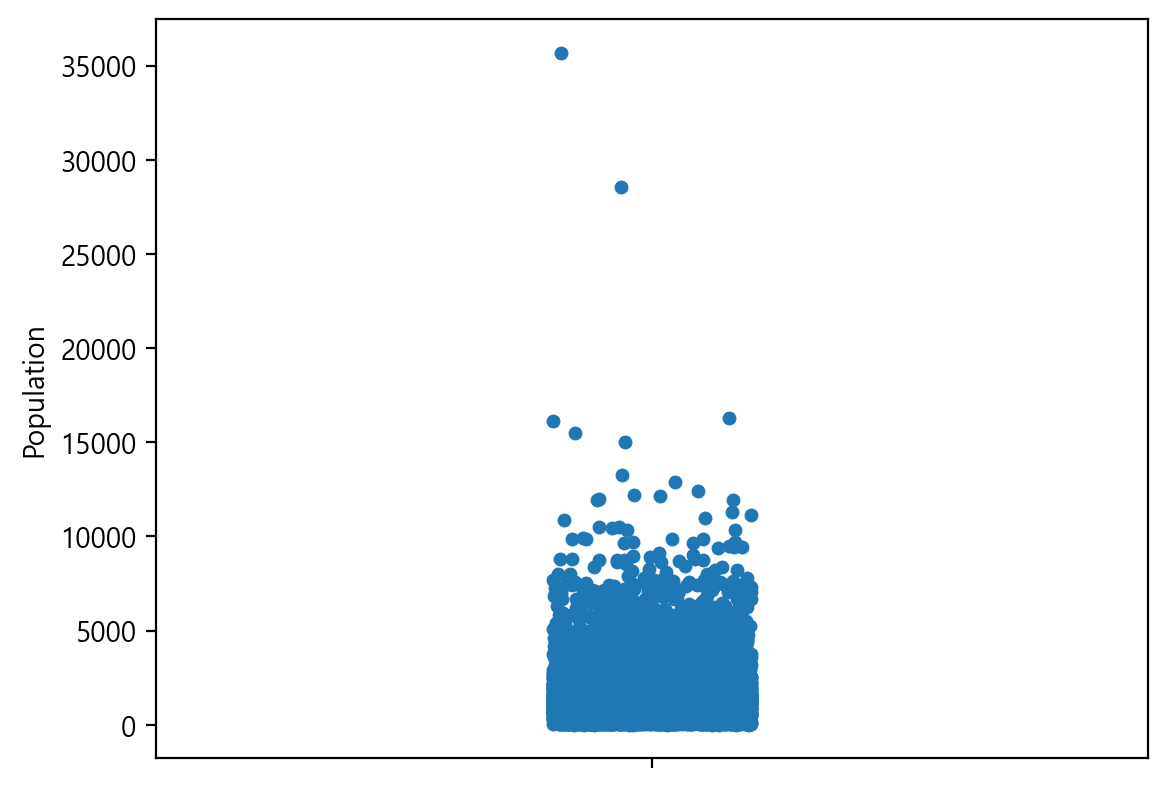

In [27]:
#10. Population의 돌출 데이터를 확인 해보자.  
sns.stripplot(data =df ['Population']); 
df.query('Population > 20000')
#위도, 경도로 위치를 확인 해보니 산지대에 있는 인구수 의심된다.!!!
#AveOccup = Population /  Household
#* Population가 에라가 나면  AveOccup 가 에러가 난다.  

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price,Household,AllRooms,AllBedrms
3364,5.5179,36.0,5.142857,1.142857,4198.0,599.714286,40.41,-120.51,0.675,7.0,36.0,8.0
13034,6.1359,52.0,8.275862,1.517241,6675.0,230.172414,38.69,-121.15,2.250,29.0,240.0,44.0
16669,4.2639,46.0,9.076923,1.307692,6532.0,502.461538,35.32,-120.70,3.500,13.0,118.0,17.0
19006,10.2264,45.0,3.166667,0.833333,7460.0,1243.333333,38.32,-121.98,1.375,6.0,19.0,5.0


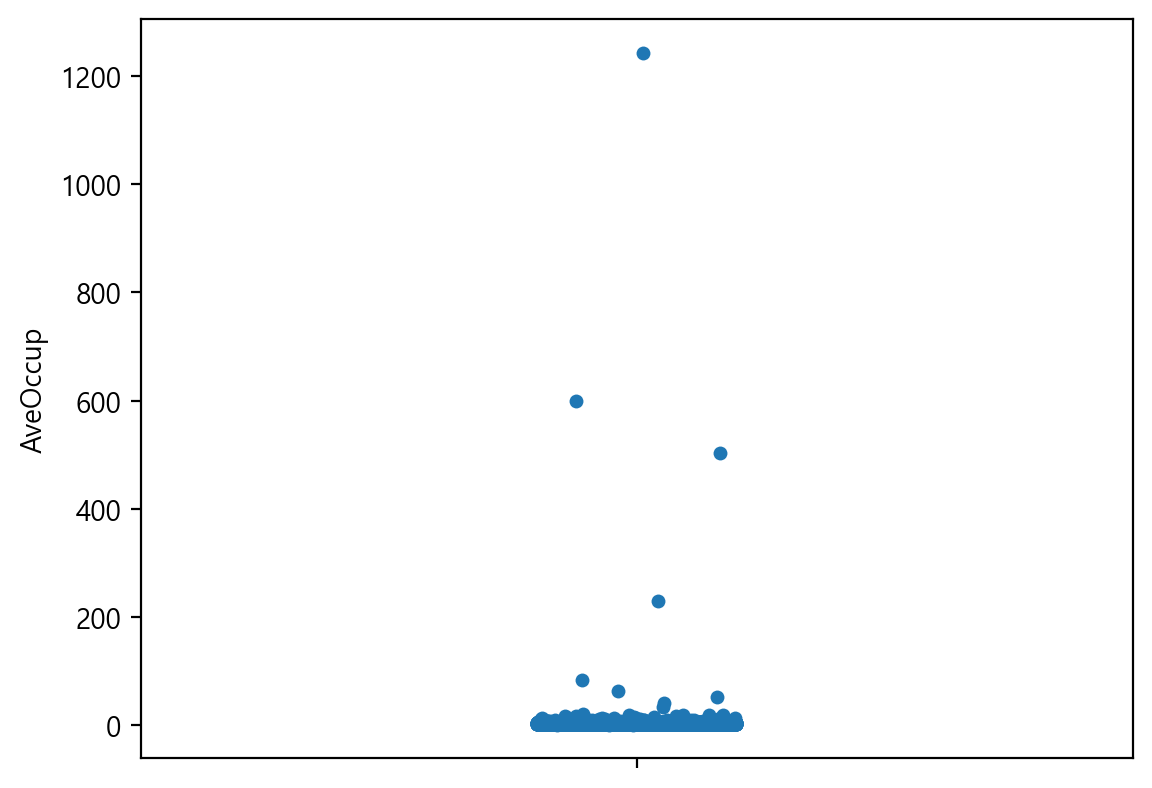

In [28]:
#11. 6)'AveOccup':  각 블록 그룹 내에 있는 가구별 '세대 인원수의' 평균치 
# 세대 인원수를 확인해보자.  -> 산점도로 확인  
sns.stripplot(data =df ['AveOccup']); 
df.query('AveOccup > 200')
#지표에 교도소 있다는 것을 확인 !
#AveOccup -> 교도소에 수감된 인원들 
# Household ->
# Population -> 실제로 거주하는 인원수  
#결론  Household , Population로 분석에 임하자.  

In [29]:
#12.  HouseAge 52.0 / Price 5.000010 -> 그래프로 확인 -> 통계정보의 Max값으로 확인  
# 각각의 최대값인 데이터 수를 확인 하자.  
print(df.query('HouseAge == 52').shape)
print(df.query('Price == 5.000010').shape)
#세대별 조사를 위 두개의 결과로 봤을 때  두개의 데이터 값으로  처리 되었다를 알수 있다.  
# 각각의 최대값의 데이터만 제외하고 분석에 사용하는 것이 맞다라고 판단  
df= df[df['HouseAge'] != 52]
df= df[df['Price'] != 5.000010]

(1273, 12)
(965, 12)


In [30]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price,Household,AllRooms,AllBedrms
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,126.0,880.0,129.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1138.0,7099.0,1106.0
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267,595.0,2555.0,665.0
15,2.1250,50.0,4.242424,1.071970,697.0,2.640152,37.85,-122.26,1.400,264.0,1120.0,283.0
18,1.9911,50.0,5.343675,1.085919,990.0,2.362768,37.84,-122.26,1.587,419.0,2239.0,455.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,330.0,1665.0,374.0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,114.0,697.0,150.0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,433.0,2254.0,485.0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,349.0,1860.0,409.0
